In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from pandas import DataFrame
from sklearn import linear_model
import seaborn as sns

In [2]:
# загрузка набор данных Ирисы:
iris = datasets.load_iris()

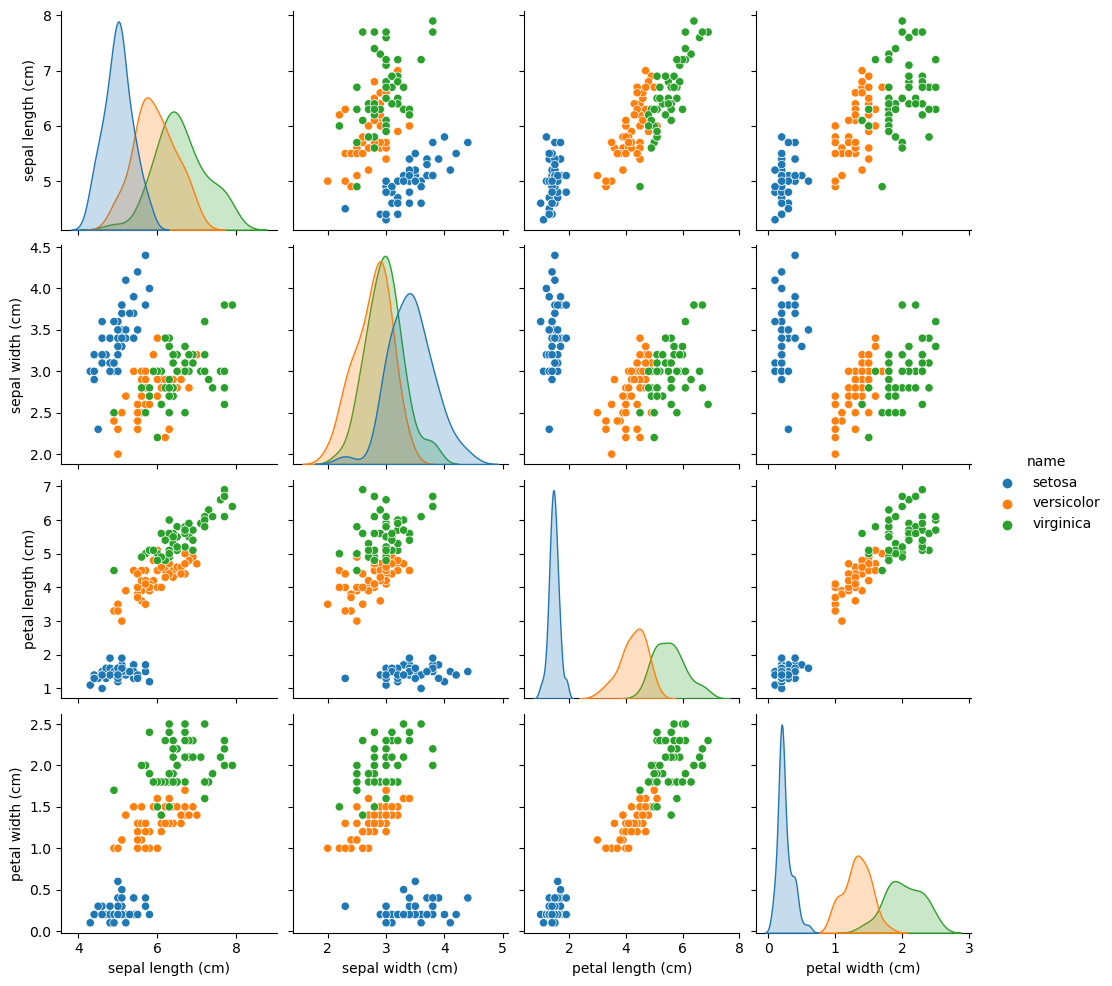

In [3]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = iris_frame.iloc[:,:5].shape
sns.pairplot(
    iris_frame[[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
        'name'
    ]],
    hue = 'name'
)

In [4]:
A = iris_frame.iloc[:,:4]
#A
U, s, W = np.linalg.svd(A)
# Транспонируем матрицу W
V = W.T

# s - список диагональных элементов, его нужно привести к виду диагональной матрицы для наглядности
Sigma = np.zeros_like(A, dtype=float)
Sigma[np.diag_indices(min(A.shape))] = s
print(f'Матрица U размер:{U.shape} :\n{U}')
print(f'Матрица Sigma размер:{Sigma.shape} :\n{Sigma}')
print(f'Матрица V размер:{V.shape} :\n{V}')

Матрица U размер:(150, 150) :
[[-0.06161685  0.12961144  0.0021386  ... -0.09343429 -0.09573864
  -0.08085465]
 [-0.05807094  0.11101978  0.07067239 ...  0.03690405 -0.03153954
   0.01309526]
 [-0.05676305  0.11796647  0.00434255 ...  0.03066199  0.19531473
   0.13569909]
 ...
 [-0.0940593  -0.0498297  -0.04144001 ...  0.98181631 -0.02194514
  -0.00894446]
 [-0.09488961 -0.05610123 -0.21297821 ... -0.02155617  0.94178018
  -0.02971961]
 [-0.08847836 -0.0515697  -0.09575285 ... -0.0086052  -0.03021088
   0.9736599 ]]
Матрица Sigma размер:(150, 4) :
[[95.95991387  0.          0.          0.        ]
 [ 0.         17.76103366  0.          0.        ]
 [ 0.          0.          3.46093093  0.        ]
 [ 0.          0.          0.          1.88482631]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.         

In [5]:
n_elements = 3
Sigma = Sigma[:, :n_elements]

V = V[:,:n_elements]
# reconstruct
B = U.dot(Sigma.dot(V.T))
print(B)

U, s, W = np.linalg.svd(B)
# Транспонируем матрицу W
V = W.T

Sigma = np.zeros_like(A, dtype=float)
Sigma[np.diag_indices(min(A.shape))] = s
print(f'Матрица Sigma размер:{Sigma.shape} :\n{Sigma}')

[[5.09900942 3.50097959 1.4014844  0.19767844]
 [4.86870364 3.03094925 1.44689807 0.12665275]
 [4.69422107 3.20571484 1.30865982 0.18645629]
 [4.62518119 3.0750981  1.4622656  0.25901553]
 [5.01947963 3.58073643 1.37080948 0.24565314]
 [5.40687172 3.89320449 1.68970262 0.41610481]
 [4.61617117 3.38400818 1.37576725 0.33789933]
 [5.01454656 3.38561478 1.47820176 0.23409183]
 [4.40998651 2.89012425 1.38503506 0.22340474]
 [4.91842577 3.08177859 1.4723887  0.14318329]
 [5.40391192 3.69613146 1.49413792 0.20916813]
 [4.8505539  3.3500068  1.5242442  0.31847992]
 [4.80311694 2.99691763 1.39532922 0.10730496]
 [4.30830887 2.99178329 1.08754903 0.11947296]
 [5.74700833 4.05240393 1.27940883 0.07580684]
 [5.69603935 4.40391672 1.5059351  0.39071768]
 [5.34517978 3.95421221 1.38214894 0.27152138]
 [5.07488831 3.52483318 1.43763026 0.24114734]
 [5.68993828 3.80995013 1.71507765 0.27641899]
 [5.12084537 3.77938583 1.46876289 0.34885395]
 [5.40422382 3.39582303 1.69367054 0.20989909]
 [5.08654623 

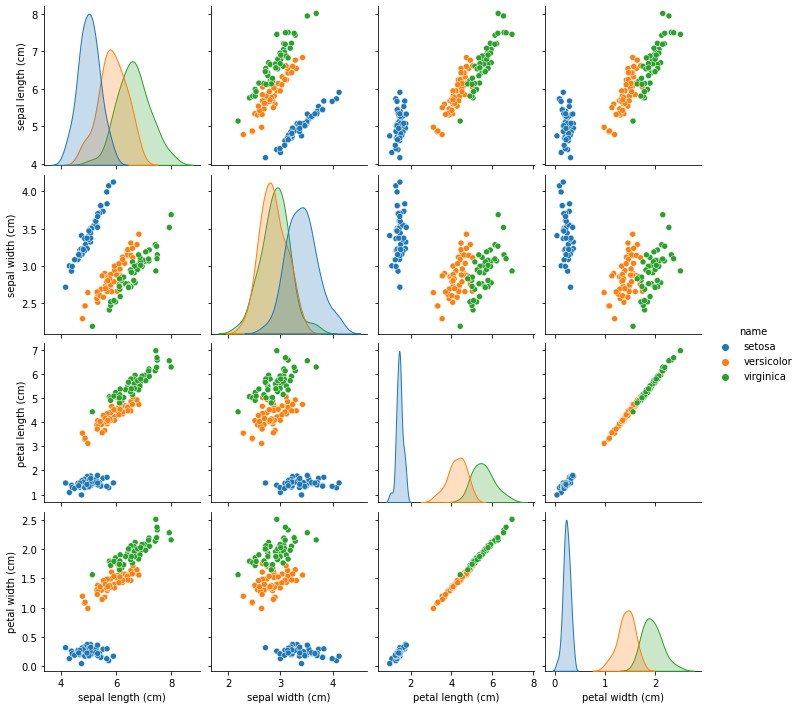

In [11]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(B)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = iris_frame.iloc[:,:5].shape
sns.pairplot(
    iris_frame[[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
        'name'
    ]], 
    hue = 'name'
)

In [12]:
B_cov = B.T @ B
print(f'Ковариационная матрица:\n{B_cov}')
U_cov, s_cov, VT_cov = np.linalg.svd(B_cov)
print(f'Собственные значения:\n{s_cov}')
print(f'Собственные векторы:\n{U_cov}')

#Встроенная Функция
B_cov_np = np.cov(B.T)
print(f'Встроенная ковариационная матрица 2:\n{B_cov_np}')
U_cov_np, s_cov_np, VT_cov_np = np.linalg.svd(B_cov_np)
print(f'Собственные значения 2:\n{s_cov_np}')
print(f'Собственные векторы 2:\n{U_cov_np}')

Ковариационная матрица:
[[5220.46398741 2677.85305589 3484.66378717 1130.51314237]
 [2677.85305589 1424.58099772 1673.2796227   528.39397772]
 [3484.66378717 1673.2796227  2581.84701401  870.01352608]
 [1130.51314237  528.39397772  870.01352608  296.86738775]]
Собственные значения:
[9.20830507e+03 3.15454317e+02 8.15917154e-13 1.84566009e-13]
Собственные векторы:
[[-0.75110816 -0.2841749   0.53932474 -0.25339687]
 [-0.38008617 -0.5467445  -0.62870507  0.40166514]
 [-0.51300886  0.70866455 -0.43811382 -0.20657382]
 [-0.16790754  0.34367081  0.34916334  0.85544281]]
Встроенная ковариационная матрица 2:
[[ 0.68222377 -0.0208085   1.28603382  0.52241054]
 [-0.0208085   0.13721124 -0.34521301 -0.15395272]
 [ 1.28603382 -0.34521301  3.10979132  1.2939947 ]
 [ 0.52241054 -0.15395272  1.2939947   0.53951014]]
Собственные значения 2:
[4.22815554e+00 2.40580934e-01 2.31799733e-16 1.69653136e-16]
Собственные векторы 2:
[[-0.36356257 -0.71605943  0.46129258 -0.37721388]
 [ 0.08751286 -0.66010344 -

In [13]:
C = W.dot(B.T).T
C2 = VT_cov.dot(B.T).T
C3 = VT_cov_np.dot(B.T).T
print(f'Матрица признаков C в новом базисе:\n{C}')
print(f'Матрица признаков C2 в новом базисе:\n{C2}')
print(f'Матрица признаков C3 в новом базисе:\n{C3}')

Матрица признаков C в новом базисе:
[[-5.91274714e+00  2.30203322e+00  4.53855108e-16  1.46123781e-16]
 [-5.57248242e+00  1.97182599e+00  5.68753517e-16  2.07420463e-17]
 [-5.44697714e+00  2.09520636e+00  4.25867961e-16  9.12551284e-17]
 [-5.43645948e+00  1.87038151e+00  4.96171931e-16  1.31516776e-17]
 [-5.87564494e+00  2.32829018e+00 -5.30788787e-17  5.72946130e-17]
 [-6.47759822e+00  2.32464996e+00  1.92610126e-16  7.79733668e-17]
 [-5.51597520e+00  2.07090423e+00  2.28312259e-16  1.12843561e-16]
 [-5.85092859e+00  2.14807482e+00  3.91495664e-16  8.33168353e-17]
 [-5.15891972e+00  1.77506408e+00  2.48049584e-16 -1.11544131e-16]
 [-5.64500117e+00  1.99000106e+00  3.99452002e-16 -3.15390831e-17]
 [-6.26539771e+00  2.42576813e+00  4.38504852e-16  3.03168798e-17]
 [-5.75200785e+00  2.02037338e+00  7.29845187e-16  1.10757141e-16]
 [-5.48058085e+00  1.97777558e+00  2.40128493e-16  1.01471991e-16]
 [-4.95112411e+00  2.04828749e+00  2.76656628e-16  1.64314659e-16]
 [-6.52596417e+00  2.91606

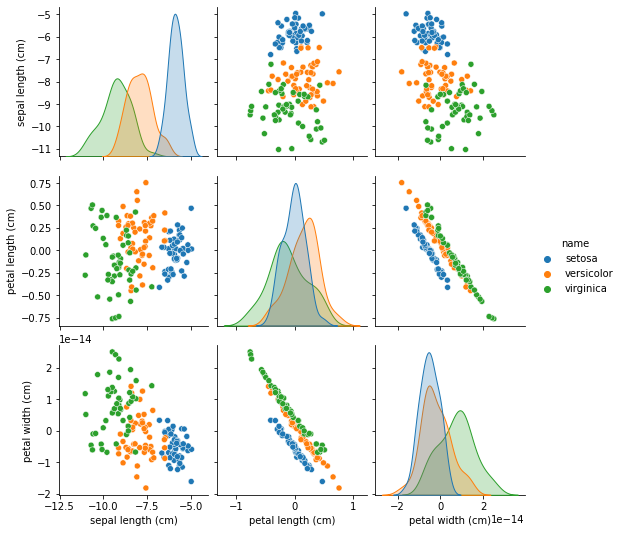

In [9]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(C2)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = iris_frame.iloc[:,:4].shape
sns.pairplot(iris_frame[['sepal length (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')


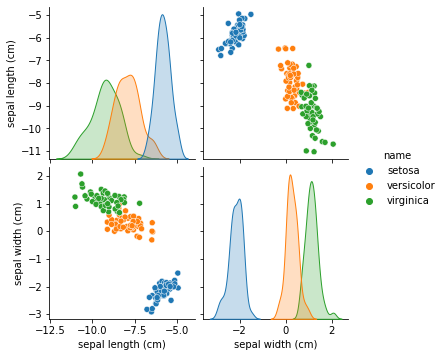

In [14]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(C2)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = iris_frame.iloc[:,:3].shape
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','name']], hue = 'name')

In [ ]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(C2)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = iris_frame.iloc[:,:5].shape
sns.pairplot(
    iris_frame[[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
        'name'
    ]], 
    hue = 'name'
)